In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import randint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import LinearSVC
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier


% matplotlib inline

In [ ]:
train_path = './data/2012/2ndcir2012X1_scraped2093.csv'
train = pd.read_csv(train_path, encoding='utf-8')

years =[('2013', '1974'), ('2014', '1793'), ('2015', '1602'), ('2016', '1655')]

for y, s in years:
    in_path = './data/{}/2ndcir{}_scraped{}.csv'.format(y, y, s)
    test = pd.read_csv(in_path, encoding='utf-8')

In [45]:
train_path = './data/2012/2ndcir2012X1_scraped2093.csv'
train = pd.read_csv(train_path, encoding='utf-8')

In [46]:
bia = 'Board\sof\sImmigration\sAppeals|"BIA"|B[.]I[.]A[.]|BIA'
BIA_train = [True if len(re.findall(bia, x)) > 0 else False for x in train['raw_text']]

In [47]:
mod_df = train['raw_text'][BIA_train]

In [48]:
drop12 = [33, 42, 204, 205, 272, 298, 301, 302, 306, 307, 308, 310, 314, 329, 336, 381, 387, 389, 481, 535, 594, 599, 614, 615]
mod_df = mod_df.reset_index(drop=True)
mod_df = mod_df.drop(drop12)

In [49]:
y = 'VACATED|REMAND|DISMISSED|DENIED|GRANTED'

cvecy = CountVectorizer(lowercase=False, token_pattern=y, binary=True)
cvecy.fit(mod_df)

CountVectorizer(analyzer=u'word', binary=True, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None,
        token_pattern='VACATED|REMAND|DISMISSED|DENIED|GRANTED',
        tokenizer=None, vocabulary=None)

In [50]:
targets  = pd.DataFrame(cvecy.transform(mod_df).todense(),
             columns=cvecy.get_feature_names())

targets.sum()

DENIED       559
DISMISSED    398
GRANTED       35
REMAND        33
VACATED      363
dtype: int64

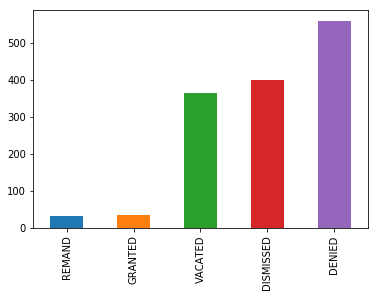

In [51]:
targets.sum().sort_values().plot(kind='bar')

In [52]:
bad_case = []
for x in range(0, len(targets)):
    if targets.sum(axis=1)[x] == 0:
        bad_case.append(targets.index[x])
print bad_case, len(bad_case)

[2, 103, 443, 574] 4


In [53]:
dup_cases = []
for b in bad_case:
    try: 
        good = int(mod_df.iloc[b][1])
    except:
        dup_cases.append(b)
print dup_cases, len(dup_cases)

[] 0


In [ ]:
drop12 = [33, 42, 204, 205, 272, 298, 301, 302, 306, 307, 308, 310, 314, 329, 336, 381, 387, 389, 481, 535, 594, 599, 614, 615]
impute12 = [(2, -1), (103, 3), (443, -1), (574, 3)]

In [44]:
mod_df.iloc[594].split('\n')

[u'',
 u'686 F.3d 66 (2012)',
 u'Venkat Rao DANDAMUDI, Naveen Parupalli, Sunitha Talluri, Nareen Adusumelli, Jitendra Kumar Patel, Lavanya Akula, Hareen Karra, Holly Elizabeth Benoit, Yecham Kumaraswamy, Grace Chan, Herng Yih Lai, Jitendra Keshavlal Patel, Sumirkumar S. Talati, Sireesh K. Thummalapally, Kaichuan Yeh, Plaintiffs-Appellees,',
 u'Vishnu Akula, Balaji Duddukuru, Murali Kothuri, Alanna Farrell, Consolidated Plaintiffs-Appellees,',
 u'Lakshman Rao Paidi, Nitasha Khurana, Young Mee Lee, Xuan Uyen Nghiem, Sirisha Parupalli, Yvonne May Perry, Harinath Talampally, Ravi Kumar Chenna, Getu Nagasa, Phuong Giang, Ngoc Bui, Seong Mi Seo Kim, Krishna Kishore Inapuri, Plaintiffs,',
 u'v.',
 u'Merryl H. TISCH, Chancellor of the New York State Board of Regents, David Steiner, Commissioner of Education, Defendants-Appellants, 67*67 ',
 u'Richard P. Mills, Commissioner of Education, New York State Department of Education, Robert M. Bennett, Chancellor of the New York State Board of Regents

In [ ]:
#'VACATED|REMAND|DISMISSED|DISMISS|DENIED|DENY|GRANTED|VACATE'
#targets['DENY'] = [-1 if x==1 else 0 for x in targets['DENY']]
#targets['DISMISS'] = [-1 if x==1 else 0 for x in targets['DISMISS']]
targets['DISMISSED'] = [-1 if x==1 else 0 for x in targets['DISMISSED']]
#targets['AFFIRMED'] = [-1 if x==1 else 0 for x in targets['AFFIRMED']]
targets['DENIED'] = [-1 if x==1 else 0 for x in targets['DENIED']]
#targets['REMAND'] = [1 if x==1 else 0 for x in targets['REMAND']]
#targets['VACATE'] = [1 if x==1 else 0 for x in targets['VACATE']]
#targets['GRANT'] = [1 if x==1 else 0 for x in targets['GRANT']]

targets['target_score'] = targets.sum(axis=1)
impute12 = [(2, -1), (103, 3), (443, -1), (574, 3)]
for i, s in impute12:
    targets['target_score'][i] = s

In [ ]:
for i, s in impute12:
    targets['target_score'][i] = s

In [ ]:
sns.distplot(targets['target_score'], kde=False)

In [ ]:
targets[targets['target_score'] ==-1]

In [ ]:
mod_df.iloc[578]

In [ ]:
FED_NY_VT_CT_citations = '\d+\sF[.]\s\d+|\d+\sF[.]\dd\s\d+|\d+\sU[.]S[.]C[.]\s[\xa7]\s\d+|\d+\sU[.]S[.]\s\d+|\
\d+\sN[.]Y[.]S[.]\s\d+|\d+\sN[.]Y[.]S[.]\dd\s\d+|\d+\sN[.]Y[.]\dd\s\d+|\d+\sN[.]Y[.]\s\d+|\
\d+\sFed[.]\sReg[.]\s\d+|Pub[.]\sL[.]\sNo[.]\s\d+[-]\d+|\d+\sF[.]\sSupp[.]\s\dd\s\d+|\d+\sF[.]Supp[.]\s\d+|\d+\sF[.]Supp[.]\dd\s\d+|\
\d+\sF[.]\sSupp[.]\s\d+|Federal\sRule\sof\sCivil\sProcedure\s\d+|\d+\sC[.]F[.]R[.]\s[\xa7]\s\d+|FED[.]\sR[.]\sCIV[.]\sP[.]\s\d+|\
FED[.]\sR[.]\sAPP[.]\sP[.]\s\d+|\d+\sB[.]R[.]\s\d+|\d+\sT[.]C[.]\s\d+|\d+\sM[.]J[.]\s\d+|\d+\sFed[.]\sCl[.]\s\d+|\d+\sCt[.]\sCl[.]\s\d+|\
\d+\sA[.]D[.]\s\d+|\d+\sA[.]D[.]\dd\s\d+|\d+\sN[.]E[.]\dd\s\d+|\d+\sN[.]E[.]\s\d+|\d+\sMisc[.]\s\d+|\d+\sMisc[.]\dd\s\d+|\
U[.]S[.]\sConst[.]\samend[.]\s\w+[,]\s[\xa7]\s\d+|Title\sVII|FRAP\s\d+|FRCP\s\d+|Fourth\sAmendment|First\sAmendment|Fifth\sAmendment|Sixth\sAmendment|\
Second\sAmendment|Eighth\sAmendment|Fourteenth\sAmendment|\Fifthteenth\sAmendment|Third\sAmendment|Seventh\sAmendment|\d+\sU[.]S[.]C[.]\s[\xa7][\xa7]\s\d+|\
U[.]S[.]S[.]G[.]\s[\xa7]\s\d+|N[.]Y[.]\sExec[.]\sLaw\s[\xa7]\s\d+|Fed[.]\sR[.]\sCiv[.]\sP[.]\s\d+|Fed[.]\sR[.]\sApp[.]\sP[.]\s\d+|\
Foreign\sSovereign\sImmunity\sAct\sof\s1976|New\sYork\sHuman\sRights\sLaw|Federal\sRule\sof\sAppellate\sProcedure\s\d+|\
I[.]R[.]C[.]\[\xa7]\d\d+|\d+\sWL\s\d+|Title\sVI|Title\sV|Title\sIV|Title\sIII|Title\sII|Title\sI|Title\sVIII|Title\sIX|Title\sX|\
N[.]Y[.]\sPenal\sLaw\s[\xa7]\s\d+|Fed[.]\sR[.]App[.]\sP[.]\s\d+|Fed[.]\sR[.]Civ[.]\sP[.]\s\d+|Fed[.]\sR[.]App[.]P[.]\s\d+|Fed[.]\sR[.]Civ[.]P[.]\s\d+|\
Fed[.]\sR[.]APP[.]P[.]\s\d+|Fed[.]\sR[.]CIV[.]P[.]\s\d+|Fed[.]\R[.]\sCrim[.]\sP[.]\s\d+|FED[.]\R[.]\sCRIM[.]\sP[.]\s\d+|\
\d+\sNYCRR\s\d+|2d\sCir[.]\sR[.]\s\d+|\d+\sFed[.]\sAppx[.]\s\d+|\
N[.]Y[.]\sC[.]P[.]L[.]R[.]\s[\xa7]\s\d+|Fed[.]R[.]Crim[.]P[].\s\d+|Fed[.]\sR[.]\sCrim[.]\sP[.]\s\d+|Fed[.]\sR[.]Crim[.]P[.]\s\d+|Federal\sRule\of\Criminal\sProcedure\s\d+|\
Administrative\sCode\sof\sthe\sCity\sof\sNew\sYork\s[\xa7]\s\d+|NY\sCorrection\sLaw\s[\xa7]\s\d+|\
\d+\sN[.]Y[.]\sLaws\sCh[.]\s\d+|N[.]Y[.]\sConst[.]\sArt[.]\s\d+[,]\s[\xa7]\s\d+|2d\sCir[.]\sL[.]R[.]\s\d+|NYPL\s[\xa7]\s\d+|New\sYork\sPenal\sCode\s[\xa7]\s\d+'

cvec_cite = CountVectorizer(lowercase=False, token_pattern=FED_NY_VT_CT_citations, binary=True)
cvec_cite.fit(mod_df)

In [ ]:
cites  = pd.DataFrame(cvec_cite.transform(mod_df).todense(),
             columns=cvec_cite.get_feature_names())

cites.sum(axis=1).sort_values().head(20)

In [ ]:
cites.sum().sort_values().tail(30).plot(kind='bar')

In [ ]:
cites.sum().sort_values().tail(35)

In [ ]:
cites.sum(axis=1).plot(kind='hist', bins=40)

In [ ]:
in_path13 = './data/2013/2ndcir2013_scraped1974.csv'
drop13 = [1, 2, 41, 56, 66, 82, 83, 101, 102, 103, 105, 119, 174, 189, 192, 199, 207, 237, 249, 255, 261, 297]
impute13 = [(275, -1), (339, -2),]

test = pd.read_csv(in_path13, encoding='utf-8')

bia = 'Board\sof\sImmigration\sAppeals|"BIA"|B[.]I[.]A[.]|BIA'
BIA_test = [True if len(re.findall(bia, x)) > 0 else False for x in test['raw_text']]
mod_test = test['raw_text'][BIA_test]

mod_test = mod_test.reset_index(drop=True)
mod_test = mod_test.drop(drop13)

targets_test  = pd.DataFrame(cvecy.transform(mod_test).todense(),
                             columns=cvecy.get_feature_names())

print targets_test.sum()

bad_case_test = []
for x in range(0, len(targets_test)):
    if targets_test.sum(axis=1)[x] == 0:
        bad_case_test.append(targets_test.index[x])
print bad_case_test, len(bad_case_test)

dup_cases_test = []
for b in bad_case_test:
    try: 
        good = int(mod_test.iloc[b][1])
    except:
        dup_cases_test.append(b)
print dup_cases_test, len(dup_cases_test)

targets_test['DISMISSED'] = [-1 if x==1 else 0 for x in targets_test['DISMISSED']]
targets_test['DENIED'] = [-1 if x==1 else 0 for x in targets_test['DENIED']]

targets_test['target_score'] = targets_test.sum(axis=1)
for i, s in impute13:
    targets_test['target_score'][i] = s

sns.distplot(targets_test['target_score'], kde=False)

In [ ]:
mod_test.iloc[296].split('\n')

In [ ]:
drop13 = [1, 2, 79, 97, 98, 99, 101, 191, 284, 41, 56, 66, 82, 119, 174, 189, 192, 207, 237, 249, 255, 261]
impute13 = [(283, -1), (348, -2),]

In [ ]:
in_path = './data/test/2016/2016X1_droped.csv'
df = pd.read_csv(in_path, encoding='utf-8')

In [ ]:
df['text_len'] = [len(t) for t in df['raw_text']]

In [ ]:
df.sort_values('text_len').head(5)

In [ ]:
df.shape

In [ ]:
df.raw_text.iloc[958].split('\n')

In [ ]:
# Cases to drop, duplicates of published cases, any unusually short opinions...
to_drop = [46]
#df_drop = dup_cases
#df_drop.extend(to_drop)
#print len(df_drop)
#print len(df)-len(df_drop)

In [ ]:
print dup_cases

In [ ]:
# WARNING: ONLY RUN ONCE!!
df.drop(index=to_drop, inplace=True)

In [ ]:
len(df)

In [ ]:
train = './data/Train/2018X1_droped.csv'
df.to_csv(train, encoding='utf-8', index=False)

In [ ]:
FED_NY_VT_CT_citations = '\d+\sF[.]\s\d+|\
\d+\sF[.]\dd\s\d+|\
\d+\sU[.]S[.]C[.]\s[\xa7]\s\d+|\
\d+\sU[.]S[.]\s\d+|\
\d+\sN[.]Y[.]S[.]\s\d+|\
\d+\sN[.]Y[.]S[.]\dd\s\d+|\
\d+\sN[.]Y[.]\dd\s\d+|\
\d+\sN[.]Y[.]\s\d+|\
N[.]Y[.]\sU[.]C[.]C[.]\sLaw\s[\xa7]\s\d+[-]\d+|\
\d+\sFed[.]\sReg[.]\s\d+|\
Pub[.]\sL[.]\sNo[.]\s\d+[-]\d+|\
\d+\sF[.]\sSupp[.]\s\dd\s\d+|\
\d+\sF[.]Supp[.]\s\d+|\
\d+\sF[.]Supp[.]\dd\s\d+|\
\d+\sF[.]\sSupp[.]\s\d+|\
Federal\sRule\sof\sCivil\sProcedure\s\d+|\
\d+\sC[.]F[.]R[.]\s[\xa7]\s\d+|\
FED[.]\sR[.]\sCIV[.]\sP[.]\s\d+|\
FED[.]\sR[.]\sAPP[.]\sP[.]\s\d+|\
\d+\sB[.]R[.]\s\d+|\
\d+\sT[.]C[.]\s\d+|\
\d+\sM[.]J[.]\s\d+|\
\d+\sFed[.]\sCl[.]\s\d+|\
\d+\sCt[.]\sCl[.]\s\d+|\
\d+\sA[.]D[.]\s\d+|\
\d+\sA[.]D[.]\dd\s\d+|\
\d+\sN[.]E[.]\dd\s\d+|\
\d+\sN[.]E[.]\s\d+|\
\d+\sMisc[.]\s\d+|\
\d+\sMisc[.]\dd\s\d+|\
U[.]S[.]\sConst[.]\samend[.]\s\w+[,]\s[\xa7]\s\d+|\
Title\sVII|FRAP\s\d+|FRCP\s\d+|Fourth\sAmendment|First\sAmendment|Fifth\sAmendment|Sixth\sAmendment|\
Second\sAmendment|Eighth\sAmendment|Fourteenth\sAmendment|\Fifthteenth\sAmendment|Third\sAmendment|Seventh\sAmendment|\
\d+\sU[.]S[.]C[.]\s[\xa7][\xa7]\s\d+|\
U[.]S[.]S[.]G[.]\s[\xa7]\s\d+|\
N[.]Y[.]\sExec[.]\sLaw\s[\xa7]\s\d+|\
Mass[.]\Gen[.]\sLaws\sch[.]\s\d+|\
Fed[.]\sR[.]\sCiv[.]\sP[.]\s\d+|\
Fed[.]\sR[.]\sApp[.]\sP[.]\s\d+|\
\d+\sN[.]Y[.]\sJur[.]\s2d[,]\sContracts\s[\xa7]|\
Foreign\sSovereign\sImmunity\sAct\sof\s1976|\
New\sYork\sHuman\sRights\sLaw|\
Federal\sRule\sof\sAppellate\sProcedure\s\d+|\
I[.]R[.]C[.]\[\xa7]\d\d+|\
\d+\sWL\s\d+|Title\sVI|Title\sV|Title\sIV|Title\sIII|Title\sII|Title\sI|Title\sVIII|Title\sIX|Title\sX|\
N[.]Y[.]\sPenal\sLaw\s[\xa7]\s\d+|\
Fed[.]\sR[.]App[.]\sP[.]\s\d+|Fed[.]\sR[.]Civ[.]\sP[.]\s\d+|Fed[.]\sR[.]App[.]P[.]\s\d+|Fed[.]\sR[.]Civ[.]P[.]\s\d+|\
Fed[.]\sR[.]APP[.]P[.]\s\d+|Fed[.]\sR[.]CIV[.]P[.]\s\d+|\
\d+\sConn[.]\s\d+|\d+\sConn[.]\sApp[.]\s\d+|\d+\sConn[.]App[.]\s\d+|\d+\sConn[.]\sSupp[.]\s\d+|\d+\sConn[.]Supp[.]\s\d+|Conn[.]\sGen[.]\sStat[.]\s[\xa7]\s\d+[-]\d+|\
Conn[.]\sRegs[.]\s\[\xa7]\s\d+[-]\d+|\d+\sVT\s\d+|\d+\sVt[.]\s\d+|Fed[.]\R[.]\sCrim[.]\sP[.]\s\d+|FED[.]\R[.]\sCRIM[.]\sP[.]\s\d+|\
\d+\sNYCRR\s\d+|\d+\sCode\sof\sVt[.]\sRules\s\d+|Connecticut\sGeneral\sStatute\s[\xa7]\s\d+|Conn[.]\sGen[.]Stat[.]\s[\xa7]\s\d+|\
Conn[.]\sR[.]App[.]\sP[.]\s[\xa7]\s\d+|N[.]Y[.]\sComp[.]Codes\sR[.]\s[&]\sRegs[.]\sTit[.]\s\d+[,]\s[\xa7]\s\d+|\
2d\sCir[.]\sR[.]\s\d+|\d+\sFed[.]\sAppx[.]\s\d+|New\sYork\sInsurance\sLaw\s[\xa7]\s\d+|Code\sof\sConduct\sfor\sUnited\sStates\sJudges[,]\sCanon\s\d+|\
N[.]Y[.]\sC[.]P[.]L[.]R[.]\s[\xa7]\s\d+|Fed[.]R[.]Crim[.]P[].\s\d+|Fed[.]\sR[.]\sCrim[.]\sP[.]\s\d+|Fed[.]\sR[.]Crim[.]P[.]\s\d+|Federal\sRule\of\Criminal\sProcedure\s\d+|\
N[.]Y[.]\sElec[.]\sLaw\s[\xa7][\xa7]\s\d+|N[.]Y[.]\sElec[.]\sLaw\s[\xa7]\s\d+|Administrative\sCode\sof\sthe\sCity\sof\sNew\sYork\s[\xa7]\s\d+|NY\sCorrection\sLaw\s[\xa7]\s\d+|\
\d+\sN[.]Y[.]\sLaws\sCh[.]\s\d+|N[.]Y[.]\sConst[.]\sArt[.]\s\d+[,]\s[\xa7]\s\d+|2d\sCir[.]\sL[.]R[.]\s\d+|NYPL\s[\xa7]\s\d+|New\sYork\sPenal\sCode\s[\xa7]\s\d+'
'ERISA|RICO|FINRA|SORNA|FLSA|IRCA'

judge_panel = 'Present:.+Judge|Before:.+Judge|PRESENT:.+Judge|BEFORE:.+Judge|in\sbanc'
judges2 = 'katzmann|leval|calabresi|cabranes|straub|raggi|mclaughlin|chin|lohier|droney|carney|lynch|livingston|\
hall|wesley|parker|sack|pooler|walker|jacobs|winter|newman|kearse|miner|in\sbanc'

In [ ]:
df['judges_string'] = [re.findall(judge_panel, x)[0] if re.findall(judge_panel, x) != [] else '' for x in df['raw_text']]
# check that every case has at least one judge...
a = 0
for x in df['judges_string']:
    if x == []:
        a = a + 1
print a

In [ ]:
judgecv = CountVectorizer(token_pattern=judges2)
judgecv.fit(df['judges_string'])

In [ ]:
with open('./assets/judgecv.pkl', 'r') as pickleinjudge:
    judgecv = pickle.load(pickleinjudge)

In [ ]:
judge_df  = pd.DataFrame(judgecv.transform(df['judges_string']).todense(),
             columns=judgecv.get_feature_names())

judge_df.sum().sort_values()

In [ ]:
judge_df.sum().plot(kind='bar')

In [ ]:
out_judge = './data/test/2016/2016_judges.csv'
judge_df.to_csv(out_judge, index=False)

In [ ]:
with open('./assets/judgecv.pkl', 'w') as picklejudge:
    pickle.dump(judgecv, picklejudge)

In [ ]:
cvec_cite = CountVectorizer(lowercase=False, token_pattern=FED_NY_VT_CT_citations, binary=True)
cvec_cite.fit(df['raw_text'])

In [ ]:
with open('./assets/cvec_cite.pkl', 'r') as pickleincite:
    cvec_cite = pickle.load(pickleincite)

In [ ]:
cites  = pd.DataFrame(cvec_cite.transform(df['raw_text']).todense(),
             columns=cvec_cite.get_feature_names())

cites.sum(axis=1).sort_values().head(20)

In [ ]:
cites.sum().sort_values().tail(30).plot(kind='bar')

In [ ]:
cites.sum().sort_values().tail(35)

In [ ]:
cites.shape

In [ ]:
cites.sum(axis=1).plot(kind='hist', bins=75)

In [ ]:
# What distrobution is this? looks slightly off normal...
sns.distplot(cites.sum(axis=1), bins=150)

In [ ]:
with open('./assets/cvec_cite.pkl', 'w') as picklecite:
    pickle.dump(cvec_cite, picklecite)

In [ ]:
out_cite = './data/test/2016/2016_cites.csv'
cites.to_csv(out_cite, encoding='utf-8', index=False)

In [ ]:
y = 'AFFIRM|REVERSE|VACATE|REMAND|DISMISS|DENIED|DENY|GRANT|ENFORCE|PUBLICLY\sREPRIMAND|CERTIFY|SANCTIONED|CERTIFICATE'

cvecy = CountVectorizer(lowercase=False, token_pattern=y, binary=True)
cvecy.fit(df['raw_text'])

In [ ]:
with open('./assets/cvec_target.pkl', 'r') as pickleiny:
    cvecy = pickle.load(pickleiny)

In [ ]:
targets  = pd.DataFrame(cvecy.transform(df['raw_text']).todense(),
             columns=cvecy.get_feature_names())

targets.sum()

In [ ]:
targets.sum().sort_values().plot(kind='bar')

In [ ]:
# This is to see how many cases have no Targets!! this number should be as small as possible but not 0. 0 means nothing
# happened and in some cases, nothing happens...
bad_case = []
for x in range(0, len(targets)):
    if targets.sum(axis=1)[x] == 0:
        bad_case.append(targets.index[x])
print bad_case, len(bad_case)

In [ ]:
# Brute Force
impute_scores = [(90, -2), (102, -2), (104, 2), (115, 2), (129, 3)]

In [ ]:
len(impute_scores)

In [ ]:
df.raw_text.iloc[129].split('\n')

In [ ]:
dup_cases = []
for x in bad_case:
    try: 
        int(df['raw_text'].iloc[x][1])
    except:
        dup_cases.append(x)
print dup_cases, len(dup_cases)

In [ ]:
# Affirm -2 Denied -1 Dismis -1 Publicly Repremand -2| Remand 0 Reverse +2 Vacate +2 Grant +2 Enforce +2 Certify 0 Sanctioned -3
targets['AFFIRM'] = [-2 if x==1 else 0 for x in targets['AFFIRM']]
targets['DENIED'] = [-1 if x==1 else 0 for x in targets['DENIED']]
targets['DENY'] = [-1 if x==1 else 0 for x in targets['DENY']]
targets['DISMISS'] = [-1 if x==1 else 0 for x in targets['DISMISS']]
#targets['PUBLICLY REPRIMAND'] = [-2 if x==1 else 0 for x in targets['PUBLICLY REPRIMAND']]
# Much Debate about this next one
targets['REMAND'] = [1 if x==1 else 0 for x in targets['REMAND']]
targets['REVERSE'] = [2 if x==1 else 0 for x in targets['REVERSE']]
targets['VACATE'] = [1 if x==1 else 0 for x in targets['VACATE']]
targets['GRANT'] = [2 if x==1 else 0 for x in targets['GRANT']]
targets['ENFORCE'] = [2 if x==1 else 0 for x in targets['ENFORCE']]
#targets['CERTIFY'] = [0 if x==1 else 0 for x in targets['CERTIFY']]
#targets['CERTIFICATE'] = [0 if x==1 else 0 for x in targets['CERTIFICATE']]
#targets['SANCTIONED'] = [-3 if x==1 else 0 for x in targets['SANCTIONED']]

targets['target_score'] = targets.sum(axis=1)

In [ ]:
for t in impute_scores:
    targets['target_score'].iloc[t[0]] = t[1]

In [ ]:
targets['target_score'].value_counts()

In [ ]:
targets[targets['target_score'] == -4]

In [ ]:
sns.distplot(targets['target_score'], kde=False)

In [ ]:
with open('./assets/cvec_target.pkl', 'w') as pickley:
    pickle.dump(cvecy, pickley)

In [ ]:
targets['target_score'].to_csv('./data/2018/2017X1_targetscore.csv', index=False, header='target_score')

In [ ]:
TRAIN = pd.read_csv('./data/Train/2012-14TRAIN.csv', encoding='utf-8')
train2015 = pd.read_csv('./data/Train/2015X1_droped.csv', encoding='utf-8')

In [ ]:
len(TRAIN) +len(train2015)

In [ ]:
TRAIN = pd.concat([TRAIN, train2015])
len(TRAIN)

In [ ]:
TRAIN.to_csv('./data/Train/2012-15TRAIN.csv', index=False, encoding='utf-8')

In [ ]:
y_train = pd.read_csv('./data/Train/2012-16_targetscore.csv')
y2014 = pd.read_csv('./data/2017/2017X1_targetscore.csv', encoding='utf-8')

In [ ]:
len(y_train)+len(y2014)

In [ ]:
y = pd.concat([y_train, y2014])
len(y)

In [ ]:
y.to_csv('./data/Train/2012-17_targetscore.csv', index=False, encoding='utf-8')

In [ ]:
pd.read_csv('./data/Train/2012-14_targetscore.csv')

In [ ]:
df = pd.DataFrame([[2, 3, 4], [5, 6, 7], [8, 9, 10]])

In [ ]:
df

In [ ]:
df[1].iloc[1] = 9

In [ ]:
df

In [ ]:
to_drop_2012_= [207, 229, 259, 327, 333, 452, 459, 480, 491, 549, 579, 590, 620, 626, 641, 644, 667, 673, 710, 785, 789,
                795, 902, 940, 954, 1010, 1084, 1092, 1093, 1097, 1123, 1229, 1271, 1297, 1316, 1327, 1330, 1337, 1435,
                1473, 1608, 1625, 1665, 1676, 1758, 1759, 1771, 1787, 1788, 1807, 1826, 1844, 1866, 1877, 1883, 1907,
                1923, 1960, 1981, 1984, 1994, 1995, 2002, 2016, 2031, 2090, 523, 2088]
impute_scores_2012_ = [(12, 0), (18, -2), (21, -2), (23, -2), (30, 0), (31, -2), (35, 2), (36, 3), (325, 2), (326, 0), (327, 2), (328, 0),
                 (329, 2), (331, -1), (333, 0), (336, 2), (337, 0), (338, 4), (472, 0), (478, 1), (484, -2), (487, 3), (488, 2),
                 (489, 1), (492, -2), (495, -2), (497, 2), (631, 1), (634, -3), (640, -2), (641, -2), (657, 0), (661, -3), (667, -2),
                 (668, 2), (671, -2), (672, -2), (679, -1), (683, 2), (898, -2), (899, 2), (980, 0), (989, 2), (990, -1), (991, 0),
                 (993, -2), (995, 1), (998, 3), (999, 2), (1001, -3), (1002, 3), (1005, -2), (1009, -2), (1223, -2), (1227, -2), (1228, 3),
                 (1229, -2), (1230, 1), (1233, 0), (1234, -1), (1295, -2), (1297, -2), (1298, -2), (1300, -2), (1303, 0), (1311, 0),
                 (1313, -1), (1314, -2), (1474, 0), (1475, 4), (1480, 3), (1488, -1), (1620, -2), (1671, -2), (1672, -2), (1676, -2),
                 (1678, 0), (1679, -2), (1680, -2), (1768, 1), (1782, -2), (1783, -2), (1784, -2), (1786, -2), (1787, 5), (1788, -2),
                 (1789, -2), (1853, 5), (1854, -2), (1901, 2), (1906, -2), (1907, -2), (1910, 2), (1913, -2), (1914, -2), (1915, -2),
                 (1916, -2), (1917, 4), (1964, -2)]

In [ ]:
len(impute_scores_2012_)+len(impute_scores_2013_)+len(impute_scores_2014_)+len(impute_scores_2015_)+len(impute_scores_2016_)+len(impute_scores_2017_)+len(impute_scores_2018_)

In [ ]:
to_drop_2013_ = [8, 59, 65, 70, 117, 119, 170, 251, 348, 384, 473, 498, 507, 519, 524, 552, 652, 760, 772, 791, 804,
                 818, 833, 836, 841, 872, 874, 879, 934, 948, 960, 976, 985, 989, 1031, 1075, 1077, 1100, 1104, 1134,
                 1145, 1295, 1312, 1314, 1355, 1388, 1396, 1442, 1605, 1669, 1673, 1684, 1693, 1714, 1724, 1727, 1834,
                 1845, 1852, 1868, 1876, 1957, 1964, 1970]

# 1553 is SANCTIONED, -3
impute_scores_2013_ = [(3, 2), (12, 0), (13, 2), (14, 2), (17, 0), (18, 0), (19, 2), (29, -2), (31, 1), (39, 1), (234, -2), (239, 3),
                       (260, 2), (365, 1), (369, 2), (379, -2), (386, 2), (388, -2), (393, -2), (508, -2), (528, 1), (553, 0), (563, -2),
                       (568, -2), (569, 0), (572, -2), (577, -2), (586, -1), (587, 0), (781, 2), (783, -2), (793, 1), (794, -1), (795, -2),
                       (796, 2), (800, 2), (801, 0), (802, -2), (878, -2), (879, 0), (880, 2), (881, -2), (882, 0), (885, 3), (889, 0),
                       (890, -2), (892, 2), (1030, -2), (1031, -2), (1032, 0), (1044, 0), (1056, -2), (1058, 0), (1069, 0), (1082, -2),
                       (1085, 0), (1088, 2), (1095, -2), (1276, 0), (1283, -2), (1286, 2), (1287, -2), (1296, -2), (1297, 2), (1298, -2),
                       (1432, -2), (1435, 2), (1437, -2), (1553, -3), (1556, -2), (1557, 0), (1558, -2), (1559, -2), (1565, -1), (1567, 2),
                       (1568, -1), (1660, -1), (1662, 3), (1688, 2), (1731, 0), (1732, -2), (1733, -2), (1735, -2), (1807, -2), (1810, -2),
                       (1811, 3), (1881, -2), (1882, -2), (1883, -2), (1892, -2), (1893, -2), (1903, 0), (1904, 2), (1906, -2)]

In [ ]:
to_drop_2014_ = [11, 12, 51, 61, 69, 102, 121, 133, 195, 202, 207, 210, 251, 277, 278, 289, 290, 322, 332, 333, 334, 335,
                 337, 367, 389, 393, 405, 438, 439, 440, 441, 442, 443, 444, 445, 447, 479, 594, 745, 844, 873, 896, 933,
                 948, 949, 972, 1084, 1115, 1157, 1178, 1232, 1338, 1361, 1422, 1450, 1489, 1540, 1629, 1784, 1178]
impute_scores_2014_ = [(6, 1), (7, -1), (8, -2), (9, 0), (17, 0), (23, 4), (25, -2), (27, -1), (31, 1), (77, 0), (146, -2),
                 (183, 2), (184, 1), (185, 1), (186, -2), (187, 2), (188, -2), (190, -2), (191, -2), (199, -2), (203, 0),
                 (205, -2), (210, -2), (211, 0), (212, -2), (214, -2), (219, -2), (274, -2), (299, 0), (304, 2), (307, -2),
                 (308, 0), (309, -3), (310, -2), (311, -2), (312, 2), (313, 3), (319, 2), (320, 3), (321, -2), (322, -2),
                 (323, -2), (326, 2), (363, -2), (400, -2), (401, -2), (402, 0), (403, 2), (404, -2), (405, -2), (406, -2),
                 (407, 1), (409, 2), (410, 2), (411, 0), (420, 0), (421, -1), (425, 0), (549, -2), (571, 2), (706, 4),
                 (712, 0), (801, 2), (803, 0), (804, 0), (814, -1), (816, -2), (817, -2), (818, 2), (820, 0), (824, -2),
                 (918, 0), (919, -2), (962, 1), (970, 1), (979, 3), (983, 0), (1080, -1), (1089, 0), (1093, -2), (1094, -2),
                 (1101, 0), (1207, -2), (1306, 2), (1329, -2), (1330, -2), (1331, -2), (1431, 2), (1447, -2), (1449, -2),
                 (1532, 0), (1629, -2), (1665, 2), (1666, -3), (1685, 0), (1719, 0), (1720, 0), (1721, 2)]

In [ ]:
to_drop_2015_ =[11, 58, 151, 173, 209, 214, 282, 283, 284, 285, 286, 352, 354, 362, 365, 374, 375, 376, 377, 378, 379,
                380, 381, 611, 746, 774, 842, 870, 948, 956, 1006, 1043, 1074, 1077, 1166, 1170, 1313, 1414, 1441, 1448,
                1456, 1475, 1486, 1521, 1573, 1600, 549]
impute_scores_2015_ = [(2, -2), (22, -2), (24, -1), (31, -2), (153, 0), (197, 3), (198, 1), (200, 1), (205, -1), (208, 2),
                 (266, 0), (267, -1), (268, 2), (269, -2), (272, -2), (273, -1), (274, -2), (291, 2), (350, -2), (351, 0),
                 (352, 2), (353, -2), (354, -1), (355, -2), (356, -2), (357, -1), (358, -2), (365, 0), (375, 2), (377, -2),
                 (497, 0), (506, 0), (581, 3), (583, -1), (586, 2), (594, 2), (716, 2), (722, -2), (723, -2), (731, 2),
                 (841, -2), (905, -2), (909, -2), (917, -3), (993, 2), (994, -2), (1042, -2), (1056, -2), (1057, -2),
                 (1062, -1), (1233, 2), (1236, -2), (1322, 0), (1324, -2), (1361, -2), (1395, -2), (1396, -2), (1422, 0),
                 (1426, 3), (1522, -2), (1536, 0), (1538, -2), (1539, -2), (1541, -1)]

In [ ]:
to_drop_2016_ = [12, 131, 165, 168, 176, 177, 178, 179, 234, 279, 280, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
                 411, 422, 425, 432, 447, 525, 619, 698, 1426, 1574, 1599, 1601, 1618, 1637, 1646, 572, 550, 48]
impute_scores_2016_ = [(13, 1), (24, -2), (164, 3), (165, -2), (167, 3), (168, -1), (169, 1), (170, 2), (176, -2), (177, 0),
                 (291, 2), (292, -2), (293, -2), (294, -3), (295, -2), (296, -2), (297, -2), (298, -2), (299, -2), (300, -1),
                 (303, -2), (306, -2), (316, -2), (398, 3), (400, 1), (401, 0), (403, 2), (404, -1), (407, -2), (414, 4),
                 (417, -2), (498, -2), (671, 0), (681, -1), (1019, -2), (1023, 0), (1383, 0), (1480, 0), (1524, -2), (1525, 0),
                 (1528, 0), (1566, -2), (1567, 0), (1593, -2), (1594, 2)]

In [ ]:
to_drop_2017_ = [20, 146, 147, 148, 261, 262, 263, 264, 265, 266, 267, 300, 319, 340, 348, 350, 351, 580, 825, 847, 999,
                 1053, 1444]
impute_scores_2017_ = [(19, -2), (108, 3), (143, 1), (144, 2), (145, 2), (233, -2), (247, -1), (248, -2), (249, 2), (250, -1),
                 (251, -2), (252, 2), (253, -2), (254, -1), (255, -2), (256, 2), (258, 1), (263, -1), (264, 2), (334, 2),
                 (336, 0), (346, -2), (442, 2), (560, 2), (569, -2), (592, 2), (654, 2), (657, 0), (820, 2), (821, 2),
                 (824, -2), (906, 2), (1022, -2), (1419, 2)]

In [ ]:
to_drop_2018_ = [46]
impute_scores_2018_ = [(90, -2), (102, -2), (104, 2), (115, 2), (129, 3)]